In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,SGD,Adagrad

In [2]:
data=pd.read_csv("wine.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data.duplicated().sum()

1177

In [5]:
data=data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [8]:
data["type"]=data["type"].map({"red":0,"white":1})

In [9]:
x=data.drop("type",axis=1)
y=data["type"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [11]:
x_train.shape

(4256, 12)

In [12]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
model=Sequential()
model.add(Dense(100,input_dim=12,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(300,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10)
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.05),metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                

In [14]:
training_info=model.fit(x_train,y_train,batch_size=500,epochs=200,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/200


9/9 [==============================] - 2s 69ms/step - loss: 0.6546 - accuracy: 0.7373 - val_loss: 0.6222 - val_accuracy: 0.7481
Epoch 2/200
9/9 [==============================] - 0s 26ms/step - loss: 0.6102 - accuracy: 0.7437 - val_loss: 0.5899 - val_accuracy: 0.7481
Epoch 3/200
9/9 [==============================] - 0s 24ms/step - loss: 0.5841 - accuracy: 0.7437 - val_loss: 0.5702 - val_accuracy: 0.7481
Epoch 4/200
9/9 [==============================] - 0s 22ms/step - loss: 0.5694 - accuracy: 0.7437 - val_loss: 0.5582 - val_accuracy: 0.7481
Epoch 5/200
9/9 [==============================] - 0s 21ms/step - loss: 0.5613 - accuracy: 0.7437 - val_loss: 0.5511 - val_accuracy: 0.7481
Epoch 6/200
9/9 [==============================] - 0s 21ms/step - loss: 0.5543 - accuracy: 0.7437 - val_loss: 0.5453 - val_accuracy: 0.7481
Epoch 7/200
9/9 [==============================] - 0s 22ms/step - loss: 0.5514 - accuracy: 0.7437 - val_loss: 0.5401 - val_accuracy: 0.7481
Epoch 8/200
9/9 [=

In [15]:
hist=training_info.history

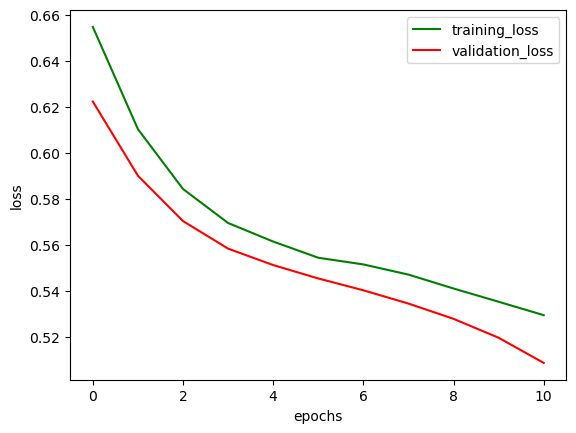

In [17]:
plt.plot(hist["loss"],label="training_loss",color="green")
plt.plot(hist["val_loss"],label="validation_loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

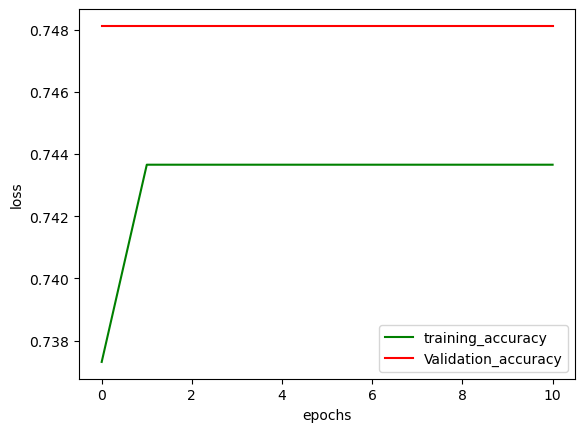

In [19]:
plt.plot(hist["accuracy"],label="training_accuracy",color="green")
plt.plot(hist["val_accuracy"],label="Validation_accuracy",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [20]:
y_pred=model.predict(x_test)

34/34 [==============================] - 0s 3ms/step


In [21]:
y_pred

array([[0.77255744],
       [0.7979638 ],
       [0.7211852 ],
       ...,
       [0.7616514 ],
       [0.7737692 ],
       [0.783162  ]], dtype=float32)

In [23]:
y_pred=((y_pred[:,0])>0.5).astype("int")

In [24]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.DataFrame({"TrueV"})